# Importing the required modules

In [23]:
import numpy as np, pandas as pd

import seaborn as sns,matplotlib.pyplot as plt

from matplotlib.lines import Line2D

import math as m, statistics as s

from scipy.stats import skew

# Loading the data in the form of the dataframe using pandas

In [24]:
df=pd.read_csv("AB_NYC_2019.csv")

# Looking in the data frame and analysing it

In [25]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
pd.isnull(df).sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [28]:
#Missing values attributes
#==========================
df1,index,attributes=pd.isnull(df).sum(),0,[]
for i in df1:
    if i!=0:
        attributes.append(df1.index[index])
        index+=1
    else:
        index+=1

attributes

['name', 'host_name', 'last_review', 'reviews_per_month']

# The data has some NaN values.

# Missing Data Handling

In [29]:
# Filling all the NaN in the name column
#=========================================

df.fillna({'name': 'name_is_unknown'}, inplace=True)

# Filling all the NaN in the host_name column
#=============================================

df.fillna({'host_name': 'host_name_is_unknown'}, inplace=True)

# Filling all the NaN in the last_review
#=========================================

# To ensure that no NaN values are present in the dataframe

df['last_review'] = df['last_review'].bfill()
df['last_review'] = df['last_review'].ffill()

# Filling all the NaN in the reviews_per_month
#==============================================

df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

#  Identifying and eliminating duplicate records to maintain data uniqueness

In [30]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-05,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,1.373221,6,2


In [31]:
#Finding the columns having duplicates entry
#=============================================
lst=[]
for i in df.columns:
    if (df[i]).duplicated().sum()!=0:
        lst.append(i)

lst        

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [32]:
# Keeping a clean backup copy of the data
#===========================================
df_cleaned=df.copy()

# Dropping all identical rows in all attributes
#==================================================
df = df.drop_duplicates()

# Distinguishing the duplicate records in certain attributes
#============================================================
for i in ['name','host_name']:
    df[i]=(df).groupby(i).cumcount().astype(str)+'_'+df[i].astype(str)

# Remove rows with invalid coordinates
#=======================================
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

# Consistent formatting and units across the dataset for accurate analysis

In [33]:
# Convert Numeric Columns to Proper Data Types
#===============================================
cols_to_convert = ['id','host_id','latitude','longitude','price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month','calculated_host_listings_count', 'availability_365']

for i in cols_to_convert:
    df[i]=pd.to_numeric(df[i],errors='coerce') 
# The above line converts all the convertable values to numeric datatypes and if not convertable then it will replace it with NaN.

# Standardize Date Format
#==========================
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check for Consistent String Formatting
#=========================================
cols_to_be_formated= ['name','host_name','neighbourhood_group', 'neighbourhood', 'room_type']
for i in cols_to_be_formated:
    df[i]=df[i].str.lower().str.strip()

# Uniforming the units
#=========================
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
#The above line removes all the unwanted characters like "$" and "," and replaces them with "" and converts the cleaned string to numeric float datatype.

# Checking the legitimacy of the data
#========================================
for i in ["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]:    
    df=df[df[i]>=0]
df=df[(df['availability_365']>=0) & (df['availability_365']<=365)]

In [34]:
# Now the dataframe is: 
#===========================
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,0_clean & quiet apt home by the park,2787,0_john,brooklyn,kensington,40.64749,-73.97237,private room,149.0,1,9,2018-10-19,0.210000,6,365
1,2595,0_skylit midtown castle,2845,0_jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225.0,1,45,2019-05-21,0.380000,2,355
2,3647,0_the village of harlem....new york !,4632,0_elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150.0,3,0,2019-07-05,1.373221,1,365
3,3831,0_cozy entire floor of brownstone,4869,0_lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89.0,1,270,2019-07-05,4.640000,1,194
4,5022,0_entire apt: spacious studio/loft by central ...,7192,0_laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80.0,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,0_charming one bedroom - newly renovated rowhouse,8232441,24_sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private room,70.0,2,0,2019-07-08,1.373221,2,9
48891,36485057,0_affordable room in bushwick/east williamsburg,6570630,4_marisol,brooklyn,bushwick,40.70184,-73.93317,private room,40.0,4,0,2019-07-08,1.373221,2,36
48892,36485431,0_sunny studio at historical neighborhood,23492952,0_ilgar & aysel,manhattan,harlem,40.81475,-73.94867,entire home/apt,115.0,10,0,2019-07-08,1.373221,1,27
48893,36485609,0_43rd st. time square-cozy single bed,30985759,5_taz,manhattan,hell's kitchen,40.75751,-73.99112,shared room,55.0,1,0,2019-07-08,1.373221,6,2


# Identifying and addressing outliers that may skew analysis or model performance

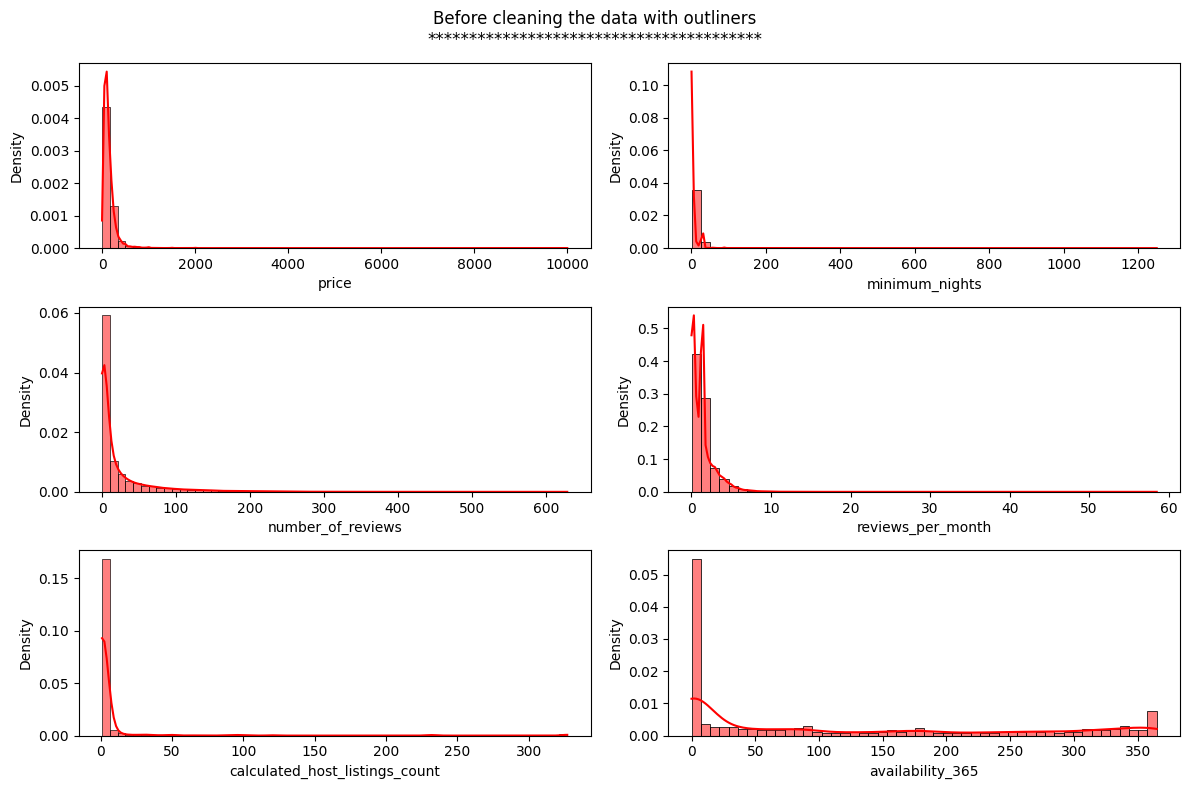

In [35]:
numeric_columns=df.select_dtypes("number").columns.tolist() # Selects columns name and adds it in the list where data type is numeric.
numeric_columns # It will be containing "id" as well as "host_id" so we need to eliminate them.

new_numeric_columns=numeric_columns[4::] # As we need to skip the first four columns here.

df_clean=df.copy()

# Plot of before cleaning the data with outlier
#=================================================
fig,axes= plt.subplots(3,2,figsize=(12,8))
for i in range(len(new_numeric_columns)):
    p1=sns.histplot(df[new_numeric_columns[i]],kde=True,color="red",stat='density',bins=60,ax=axes[int(i/2)][i%2]) if i%2==0 else sns.histplot(df[new_numeric_columns[i]],kde=True,color="red",stat='density',bins=50,ax=axes[int((i-1)/2)][i%2])

pl2=plt.suptitle(f"Before cleaning the data with outliners\n{"*"*40}")
plt.tight_layout()
plt.show()

In [36]:
# Uncleaned data stats
#=======================
dataframe_1=df[new_numeric_columns].mean()
dataframe_2=df[new_numeric_columns].skew()
before_stats=pd.DataFrame({'mean': dataframe_1,"skewness": dataframe_2})
print("\t:::Before cleaning the stats are:::\n","*"*60)
before_stats

	:::Before cleaning the stats are:::
 ************************************************************


,mean,skewness
price,152.720687,19.118939
minimum_nights,7.029962,21.827275
number_of_reviews,23.274466,3.690635
reviews_per_month,1.373221,3.511906
calculated_host_listings_count,7.143982,7.933174
availability_365,112.781327,0.763408


In [37]:
# Outlier Removal using IQR
#===============================
Q1=df_clean[new_numeric_columns].quantile(0.25) # 25 percent of all the values are below this value.
Q3=df_clean[new_numeric_columns].quantile(0.75) # 75 percent of all the values are below this value.

IQR=Q3-Q1 # Interquartile_Range

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

# Adding new outlier attribute added for each new_numeric_column of the dataframe 
#===================================================================================
for i in new_numeric_columns:
    df_clean[f"outlier_{i}"]=df_clean[i].apply(lambda x: "Yes" if x>upper_bound[i] or x<lower_bound[i] else "No")

# Dataframe with outlier status for each new_numeric_columns
#=============================================================
df_clean

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,outlier_price,outlier_minimum_nights,outlier_number_of_reviews,outlier_reviews_per_month,outlier_calculated_host_listings_count,outlier_availability_365
0,2539,0_clean & quiet apt home by the park,2787,0_john,brooklyn,kensington,40.64749,-73.97237,private room,149.0,...,2018-10-19,0.210000,6,365,No,No,No,No,Yes,No
1,2595,0_skylit midtown castle,2845,0_jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225.0,...,2019-05-21,0.380000,2,355,No,No,No,No,No,No
2,3647,0_the village of harlem....new york !,4632,0_elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150.0,...,2019-07-05,1.373221,1,365,No,No,No,No,No,No
3,3831,0_cozy entire floor of brownstone,4869,0_lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89.0,...,2019-07-05,4.640000,1,194,No,No,Yes,Yes,No,No
4,5022,0_entire apt: spacious studio/loft by central ...,7192,0_laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80.0,...,2018-11-19,0.100000,1,0,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,0_charming one bedroom - newly renovated rowhouse,8232441,24_sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private room,70.0,...,2019-07-08,1.373221,2,9,No,No,No,No,No,No
48891,36485057,0_affordable room in bushwick/east williamsburg,6570630,4_marisol,brooklyn,bushwick,40.70184,-73.93317,private room,40.0,...,2019-07-08,1.373221,2,36,No,No,No,No,No,No
48892,36485431,0_sunny studio at historical neighborhood,23492952,0_ilgar & aysel,manhattan,harlem,40.81475,-73.94867,entire home/apt,115.0,...,2019-07-08,1.373221,1,27,No,No,No,No,No,No
48893,36485609,0_43rd st. time square-cozy single bed,30985759,5_taz,manhattan,hell's kitchen,40.75751,-73.99112,shared room,55.0,...,2019-07-08,1.373221,6,2,No,No,No,No,Yes,No


In [38]:
# Count of outlier for each attributes of new_numeric_columns
#==============================================================
for i in new_numeric_columns:
    try:
        print(f"Number of outliers in {i} column is : {df_clean[f"outlier_{i}"].value_counts()['Yes']}")
    except:
        print(f"Number of outliers in {i} column is : 0")

Number of outliers in price column is : 2972
Number of outliers in minimum_nights column is : 6607
Number of outliers in number_of_reviews column is : 6021
Number of outliers in reviews_per_month column is : 4103
Number of outliers in calculated_host_listings_count column is : 7081
Number of outliers in availability_365 column is : 0


In [39]:
# Accomodating the outliers in the new_numeric_columns
#======================================================
for i in new_numeric_columns:    
    df_clean[i]=df_clean[i].clip(lower=lower_bound[i],upper=upper_bound[i])

In [40]:
# Cleaned data stats
#=======================
dataframe_3=df_clean[new_numeric_columns].mean()
dataframe_4=df_clean[new_numeric_columns].skew()
after_stats=pd.DataFrame({'mean': dataframe_3, 'skewness': dataframe_4})

print(f"\t:::After cleaning stats are:::\n{'*'*60}")
after_stats

	:::After cleaning stats are:::
************************************************************


,mean,skewness
price,132.979753,1.022770
minimum_nights,3.825320,1.286117
number_of_reviews,15.674190,1.228974
reviews_per_month,1.241612,0.842560
calculated_host_listings_count,1.614920,1.153611
availability_365,112.781327,0.763408


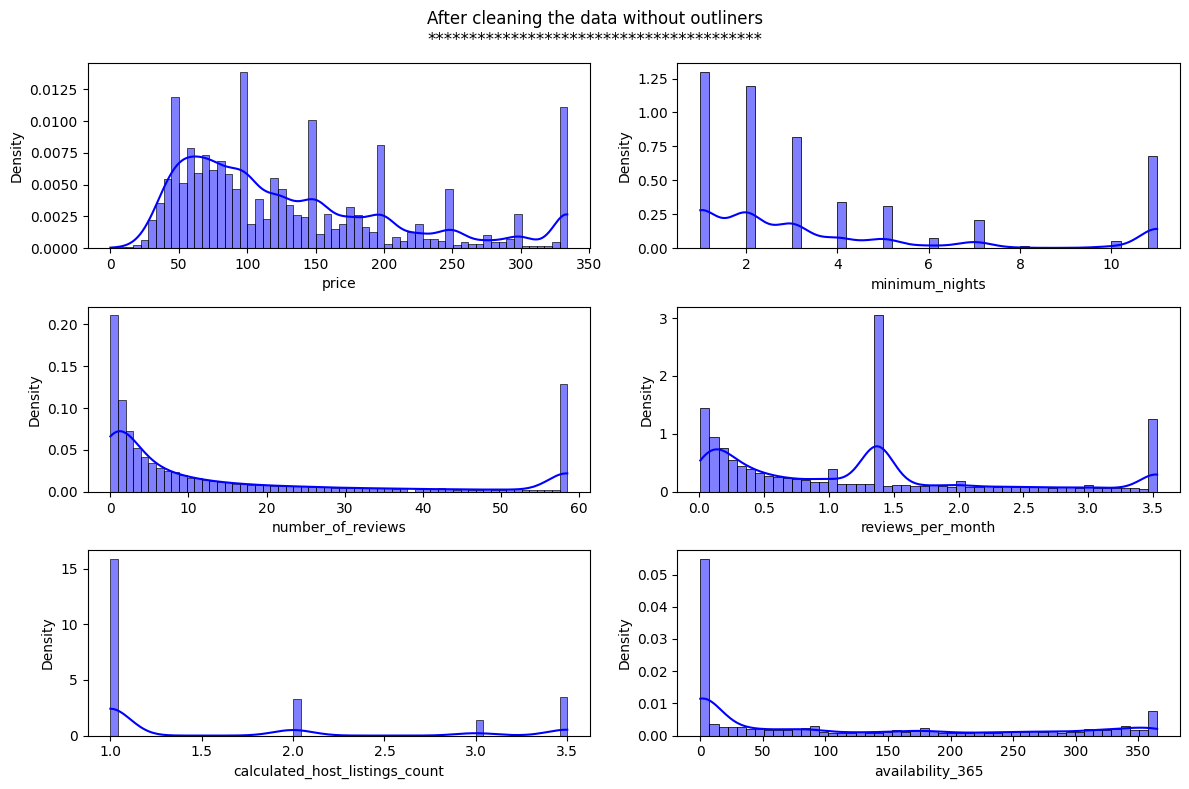

In [41]:
# Plot of after cleaning the data with outlier
#=================================================
fig,axes= plt.subplots(3,2,figsize=(12,8))
for i in range(len(new_numeric_columns)):
    p1=sns.histplot(df_clean[new_numeric_columns[i]],kde=True,color="blue",stat='density',bins=60,ax=axes[int(i/2)][i%2]) if i%2==0 else sns.histplot(df_clean[new_numeric_columns[i]],kde=True,color="blue",stat='density',bins=50,ax=axes[int((i-1)/2)][i%2])

p2=plt.suptitle(f"After cleaning the data without outliners\n{"*"*40}")
plt.tight_layout()
plt.show()

# Combined Summary

In [42]:
# Stats comparison
#===================
result_1=before_stats.join(after_stats,lsuffix="_before_cleaning",rsuffix="_after_cleaning")
desired_columns=["mean_before_cleaning","mean_after_cleaning","skewness_before_cleaning","skewness_after_cleaning"]
result_1=result_1.reindex(columns=desired_columns)
result_1

,mean_before_cleaning,mean_after_cleaning,skewness_before_cleaning,skewness_after_cleaning
price,152.720687,132.979753,19.118939,1.022770
minimum_nights,7.029962,3.825320,21.827275,1.286117
number_of_reviews,23.274466,15.674190,3.690635,1.228974
reviews_per_month,1.373221,1.241612,3.511906,0.842560
calculated_host_listings_count,7.143982,1.614920,7.933174,1.153611
availability_365,112.781327,112.781327,0.763408,0.763408


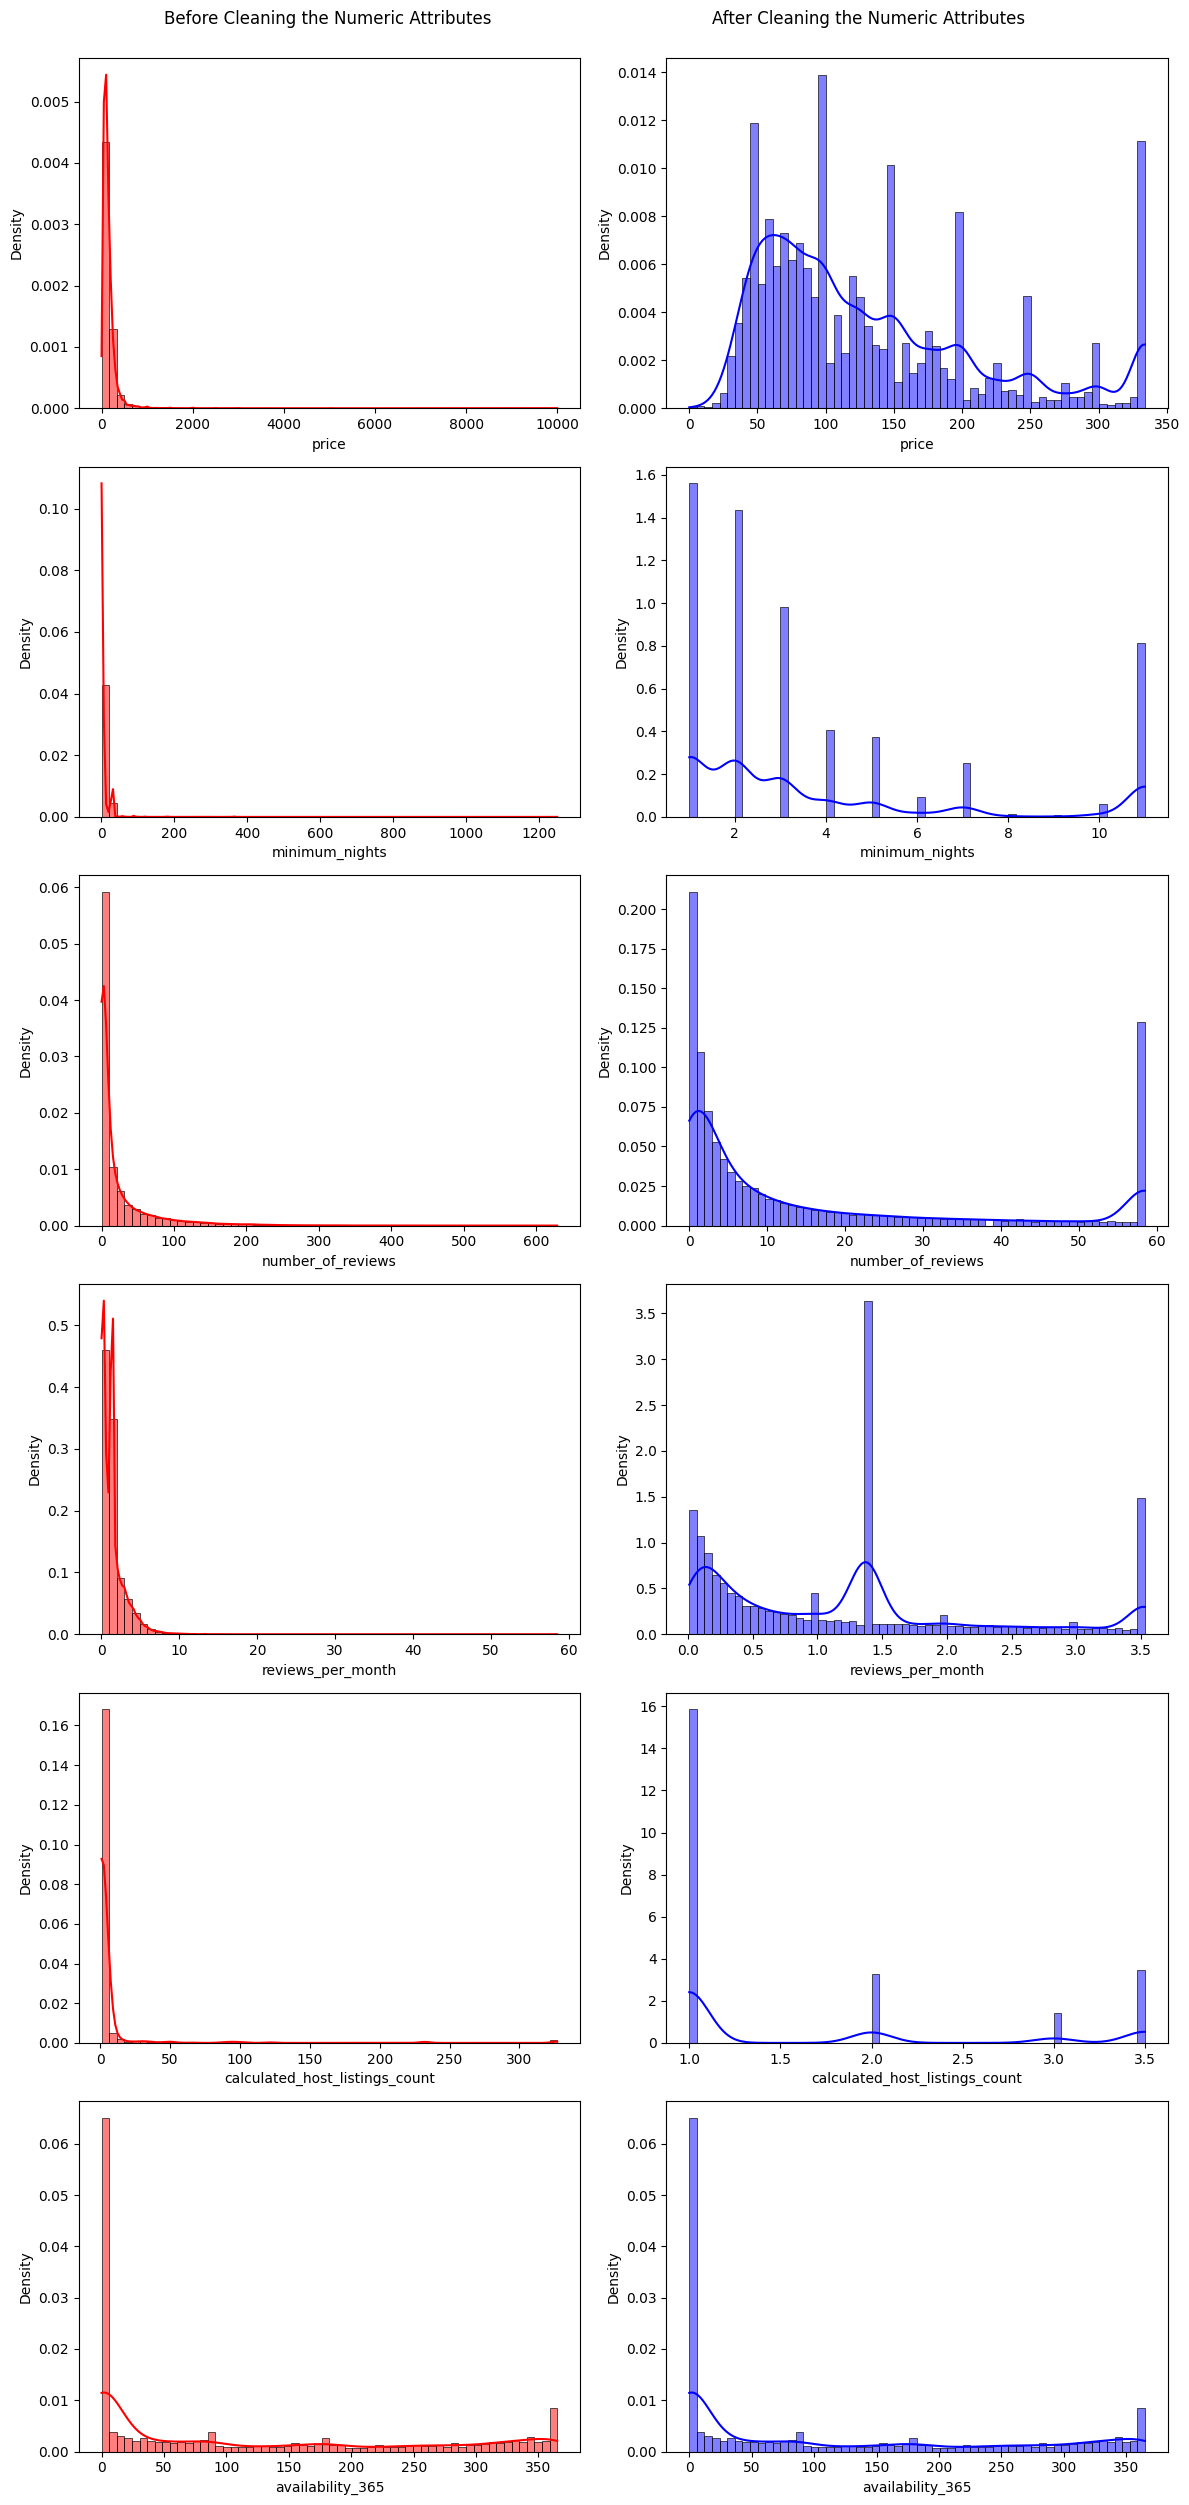

In [43]:
# Visualization comparison
#==========================
fig,axes= plt.subplots(6,2,figsize=(12,25))
for i in range(len(new_numeric_columns)):
    p1=sns.histplot(df[new_numeric_columns[i]],color="red",kde=True,stat="density",ax=axes[i][0],bins=60)
    p2=sns.histplot(df_clean[new_numeric_columns[i]],color="blue",kde=True,stat="density",ax=axes[i][1],bins=60)
p3=plt.suptitle(f"Before Cleaning the Numeric Attributes {' '*15}{' '*25} After Cleaning the Numeric Attributes",y=1.0)   
plt.tight_layout()
plt.show()

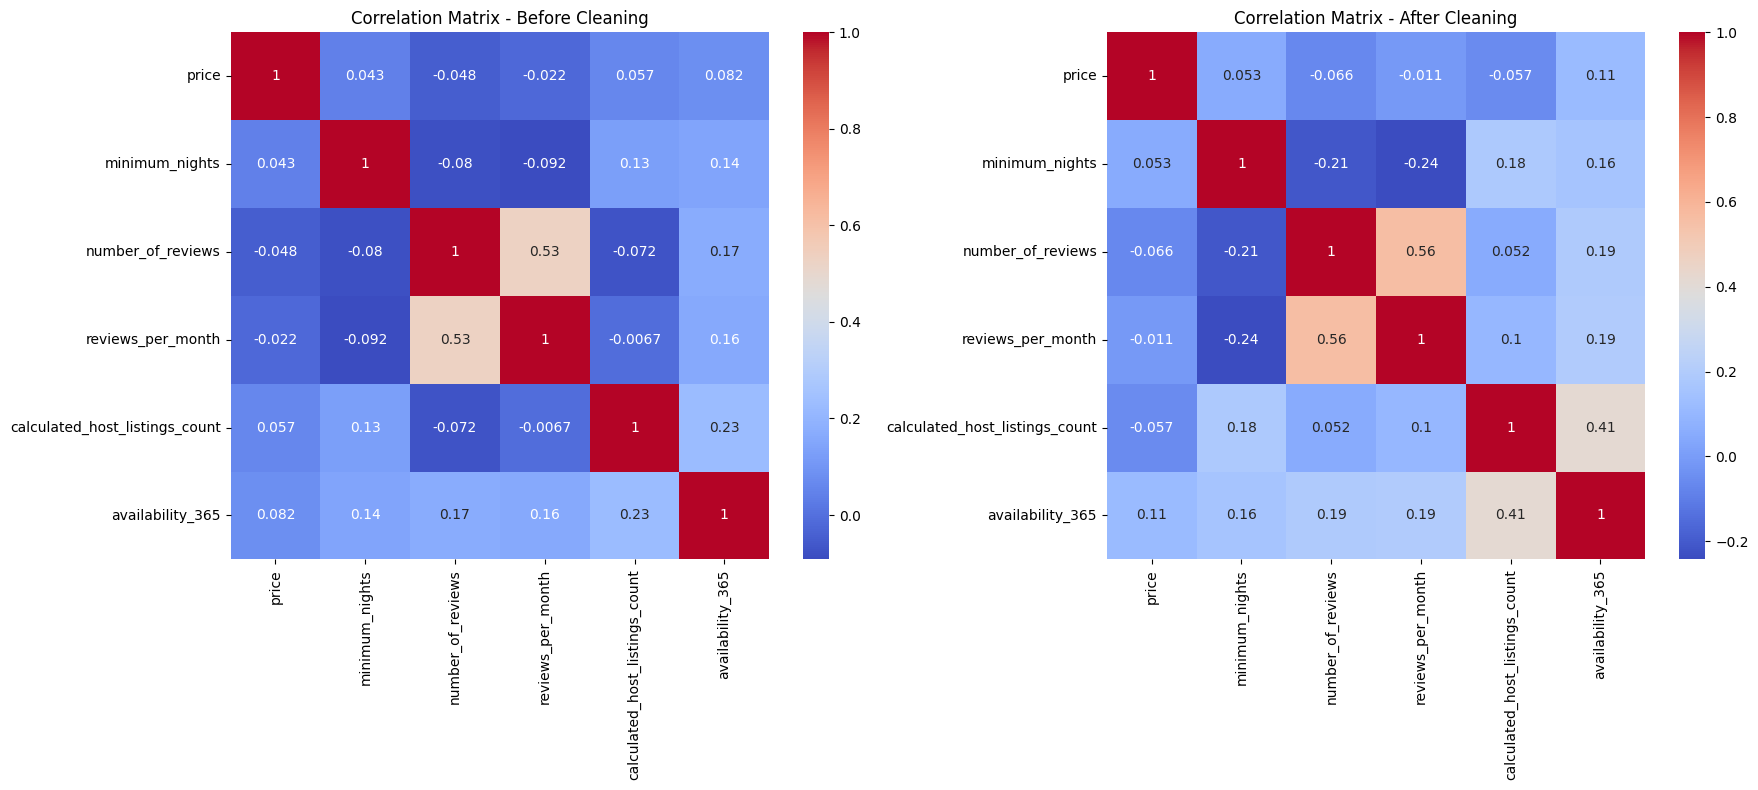

In [44]:
# Corelation heatmap
#======================
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
p1=sns.heatmap(df[new_numeric_columns].corr(), annot=True, cmap='coolwarm', ax=axes[0])
p2=axes[0].set_title("Correlation Matrix - Before Cleaning")

p3=sns.heatmap(df_clean[new_numeric_columns].corr(), annot=True, cmap='coolwarm', ax=axes[1])
p4=axes[1].set_title("Correlation Matrix - After Cleaning")

plt.tight_layout()
plt.show()